In [1]:
import cv2
import matplotlib.pyplot as plt

In [9]:
image = cv2.imread('sea cliff.jpeg',1)
image_rgb =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

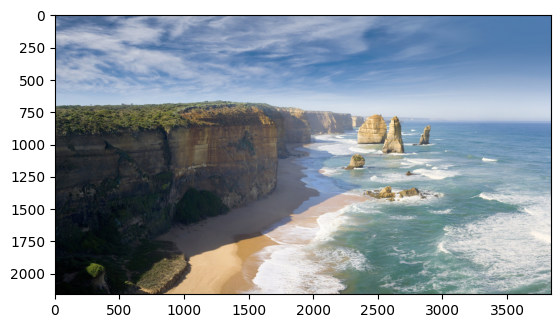

In [11]:
plt.imshow(image_rgb)

In [12]:
import numpy as np
matrix = np.ones(image_rgb.shape,dtype='uint8')*50

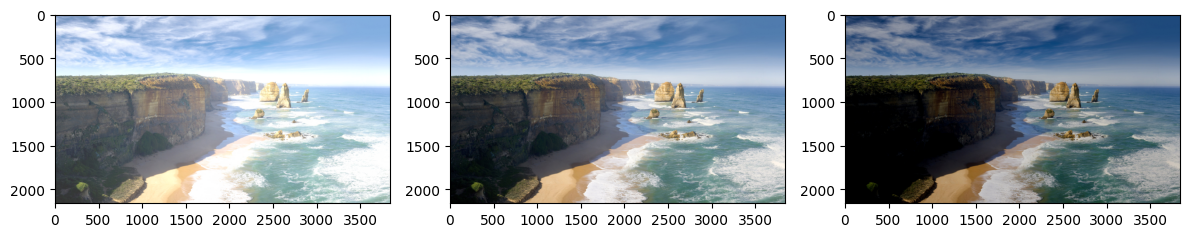

In [18]:
plt.figure(figsize=
           (12,8))
bright = cv2.add(image_rgb,matrix)
dark = cv2.subtract(image_rgb,matrix)
plt.subplot(131)
plt.imshow(bright)
plt.subplot(132)
plt.imshow(image_rgb)
plt.subplot(133)
plt.imshow(dark)
plt.tight_layout()

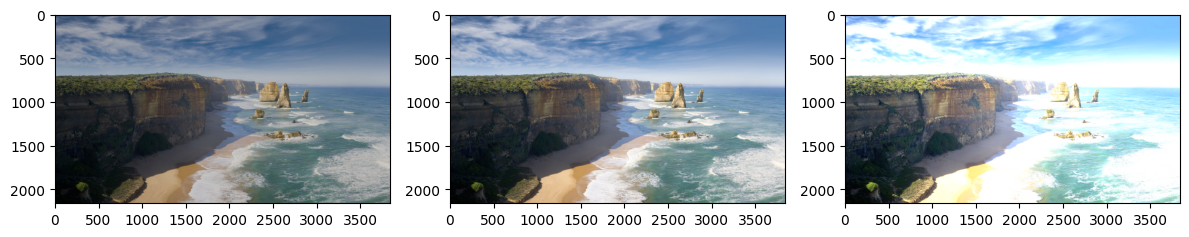

In [43]:
plt.figure(figsize=(12,8))
matrix1 = np.ones(image_rgb.shape)*0.8
martrix2 = np.ones(image_rgb.shape)*1.6

low_contrast = np.uint((cv2.multiply(np.float64(image_rgb),matrix1)))
high_contrast = np.uint(np.clip((cv2.multiply(np.float64(image_rgb),martrix2)),0,255))

plt.subplot(131);plt.imshow(low_contrast);
plt.subplot(132);plt.imshow(image_rgb);
plt.subplot(133);plt.imshow(high_contrast);
plt.tight_layout()

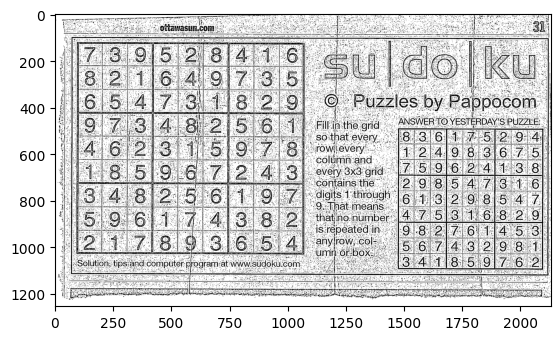

In [82]:
suduku = cv2.imread('suduku.jpeg')
suduku_grey = cv2.cvtColor(suduku,cv2.COLOR_BGR2GRAY)
thresh_image = cv2.adaptiveThreshold(suduku_grey,255,adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv2.THRESH_BINARY,blockSize=9,C=6)

plt.imshow(thresh_image,cmap='grey')

In [84]:
cv2.namedWindow('Preview',cv2.WINDOW_NORMAL)

source = cv2.VideoCapture(0)
while cv2.waitKey(1) != 27:
    ret,frame = source.read()
    if not ret:
        break
    cv2.imshow('Preview',frame)
    
source.release()
cv2.destroyWindow('Preview')